In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_obv_with_window(data, window=5):
    """
    Calculate OBV (On-Balance Volume) using a specified window size.

    Parameters:
    data (DataFrame): A DataFrame with 'Close' and 'Volume' columns.
    window (int): The number of recent periods to consider for OBV calculation.

    Returns:
    DataFrame: A DataFrame with an additional 'OBV_Window' column.
    """
    obv = [0]  # Initialize OBV with the first value as 0
    obv_changes = [0]  # Initialize OBV changes list to keep track of recent changes

    for i in range(1, len(data)):
        obv_change = 0
        if data['Close'].values[i] > data['Close'].values[i - 1]:
            obv_change = data['Volume'].values[i]
        elif data['Close'].values[i] < data['Close'].values[i - 1]:
            obv_change = -data['Volume'].values[i]

        obv_changes.append(obv_change)
        rolling_obv = sum(obv_changes[max(0, i-window):i+1])
        obv.append(rolling_obv)

    data['OBV_Window'] = obv
    return data

def analyze_and_plot_tickers(tickers, start_date, end_date, window=5):
    """
    Analyze and plot OBV for a list of tickers.

    Parameters:
    tickers (list): List of stock tickers.
    start_date (str): Start date for fetching data (format: YYYY-MM-DD).
    end_date (str): End date for fetching data (format: YYYY-MM-DD).
    window (int): The window size for OBV calculation.
    """
    results = {}

    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)

        if 'Close' in data.columns and 'Volume' in data.columns:
            data = calculate_obv_with_window(data, window=window)
            results[ticker] = data

            # Plot the OBV
            plt.figure(figsize=(14, 6))
            plt.plot(data.index, data['OBV_Window'], label='OBV (Window)', color='blue')
            plt.title(f'OBV with {window}-Period Window for {ticker}')
            plt.xlabel('Date')
            plt.ylabel('OBV')
            plt.legend()
            plt.grid()

            # Highlight crossing points
            for i in range(1, len(data)):
                prev_value = data['OBV_Window'].iloc[i - 1]
                curr_value = data['OBV_Window'].iloc[i]
                if prev_value >= 0 and curr_value < 0:
                    plt.axvline(x=data.index[i], color='red', linestyle='--')
                elif prev_value <= 0 and curr_value > 0:
                    plt.axvline(x=data.index[i], color='blue', linestyle='--')

            # Add Close price on a secondary y-axis
            plt.twinx()
            plt.plot(data.index, data['Close'], label='Close Price', color='red', linestyle='--')
            plt.ylabel('Close Price')
            plt.legend(loc='upper left')
            plt.show()

        else:
            print(f"Data for {ticker} does not contain 'Close' or 'Volume' columns.")

    return results

# Example usage
tickers = ["330590.KS", "AAPL", "MSFT"]  # Replace with your stock tickers
start_date = "2021-01-01"
end_date = "2024-12-11"
window = 24

results = analyze_and_plot_tickers(tickers, start_date, end_date, window=window)

# Print the last few rows of the dataset for each ticker
for ticker, data in results.items():
    print(f"Ticker: {ticker}")
    print(data[['Close', 'Volume', 'OBV_Window']].tail())


[*********************100%***********************]  1 of 1 completed


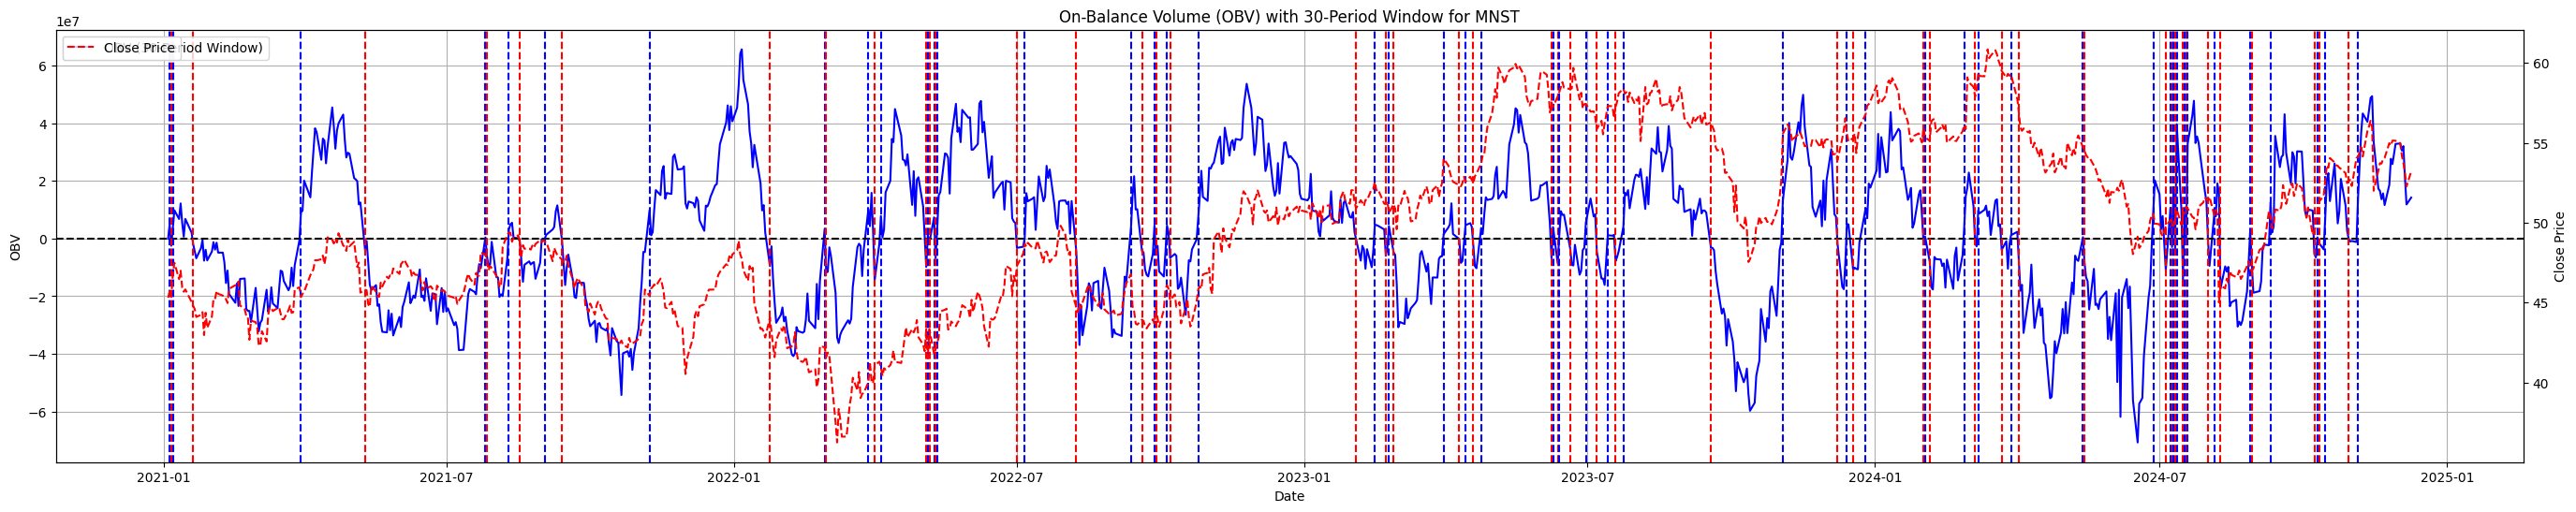

Price           Close   Volume  OBV_Window
Ticker           MNST     MNST            
Date                                      
2024-12-03  54.189999  5378200  [30498600]
2024-12-04  53.750000  4035800  [32044600]
2024-12-05  53.099998  4677600  [21116700]
2024-12-06  52.270000  3937200  [11813700]
2024-12-09  53.209999  5994500  [14201600]


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_obv_with_window(data, window=5):
    """
    Calculate OBV (On-Balance Volume) using a specified window size.

    Parameters:
    data (DataFrame): A DataFrame with 'Close' and 'Volume' columns.
    window (int): The number of recent periods to consider for OBV calculation.

    Returns:
    DataFrame: A DataFrame with an additional 'OBV_Window' column.
    """
    obv = [0]  # Initialize OBV with the first value as 0
    obv_changes = [0]  # Initialize OBV changes list to keep track of recent changes

    for i in range(1, len(data)):
        # Initialize OBV change
        obv_change = 0

        # Calculate OBV change based on the Close price comparison
        if data['Close'].values[i] > data['Close'].values[i - 1]:
            obv_change = data['Volume'].values[i]
        elif data['Close'].values[i] < data['Close'].values[i - 1]:
            obv_change = -data['Volume'].values[i]

        obv_changes.append(obv_change)

        # Maintain the rolling sum of OBV changes within the window size
        if i >= window:
            rolling_obv = sum(obv_changes[i-window:i])  # Sum the last 'window' periods
        else:
            rolling_obv = sum(obv_changes[:i+1])  # If less than 'window' periods, sum all

        obv.append(rolling_obv)  # Append the calculated OBV for the current period

    data['OBV_Window'] = obv  # Add the OBV_Window to the DataFrame
    return data

# Example: Fetch stock data and calculate OBV with a 30-period window
#ticker = "330590.KS"  # Replace with your stock ticker
ticker = "MNST"
data = yf.download(ticker, start="2021-01-01", end="2024-12-11")

# Ensure necessary columns exist
if 'Close' in data.columns and 'Volume' in data.columns:
    data = calculate_obv_with_window(data, window=24)

    # Plot the limited-window OBV
    plt.figure(figsize=(34, 6))
    plt.plot(data.index, data['OBV_Window'], label='OBV (30-Period Window)', color='blue')
    plt.title(f'On-Balance Volume (OBV) with 30-Period Window for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('OBV')
    plt.legend()
    plt.grid()

    plt.axhline(y=0, color='black', linestyle='--')


    for i in range(1, len(data)):  # i=0을 건너뛰기 위해 range(1, len(data)) 사용
        # 현재와 이전 인덱스 가져오기
        prev_index = data.index[i - 1]
        curr_index = data.index[i]

        # 이전 값과 현재 값 가져오기
        prev_value = data['OBV_Window'].iloc[i - 1]
        curr_value = data['OBV_Window'].iloc[i]

        # 조건에 따라 수직선 추가
        if prev_value >= 0 and curr_value < 0:
            plt.axvline(x=curr_index, color='red', linestyle='--')  # 인덱스 기준으로 선 추가
        if prev_value <= 0 and curr_value > 0:
            plt.axvline(x=curr_index, color='blue', linestyle='--')



    plt.twinx()
    plt.plot(data.index, data['Close'], label='Close Price', color='red', linestyle='--')
    plt.ylabel('Close Price')
    plt.legend(loc='upper left')
    plt.show()

else:
    print("Data does not contain 'Close' or 'Volume' columns.")

# Display the first few rows of the dataset with OBV
print(data[['Close', 'Volume', 'OBV_Window']].tail())


In [ ]:
 import yfinance as yf
import pandas as pd

# Fetch TSLA data from yfinance
ticker = "AMD"
data = yf.download(ticker, period="5y")

# Add a column for percentage change in volume compared to the previous day
data['Volume_Change'] = data['Volume'].pct_change()

# Filter for days where the volume increased significantly (e.g., by more than x%)
x = 1.0  # Adjust the threshold as needed (e.g., 1.0 = 100% increase)
significant_days = data[data['Volume_Change'] > x].index

# Function to fetch 20 days before and after each significant day
def get_surrounding_data(data, days=20):
    results = []
    for day in significant_days:
        start = day - pd.Timedelta(days=days)
        end = day + pd.Timedelta(days=days)
        surrounding_data = data.loc[start:end]
        surrounding_data['Significant_Day'] = day
        results.append(surrounding_data)
    return results

# Get surrounding data
surrounding_data = get_surrounding_data(data)

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-948090cb8f3b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surrounding_data['Significant_Day'] = day
<ipython-input-1-948090cb8f3b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surrounding_data['Significant_Day'] = day
<ipython-input-1-948090cb8f3b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
import matplotlib.pyplot as plt

# Function to plot data
def plot_surrounding_data(data, significant_days, days=20):
    for day in significant_days:
        start = day - pd.Timedelta(days=days)
        end = day + pd.Timedelta(days=days)
        subset = data.loc[start:end]

        plt.figure(figsize=(12, 6))
        plt.plot(subset.index, subset['Volume'], label='Volume', marker='o')
        plt.axvline(x=day, color='r', linestyle='--', label='Significant Day')
        plt.title(f"TSLA Volume Trend Around Significant Day: {day.date()}")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.legend()
        plt.grid()
        plt.show()

# Call the plot function
plot_surrounding_data(data, significant_days)


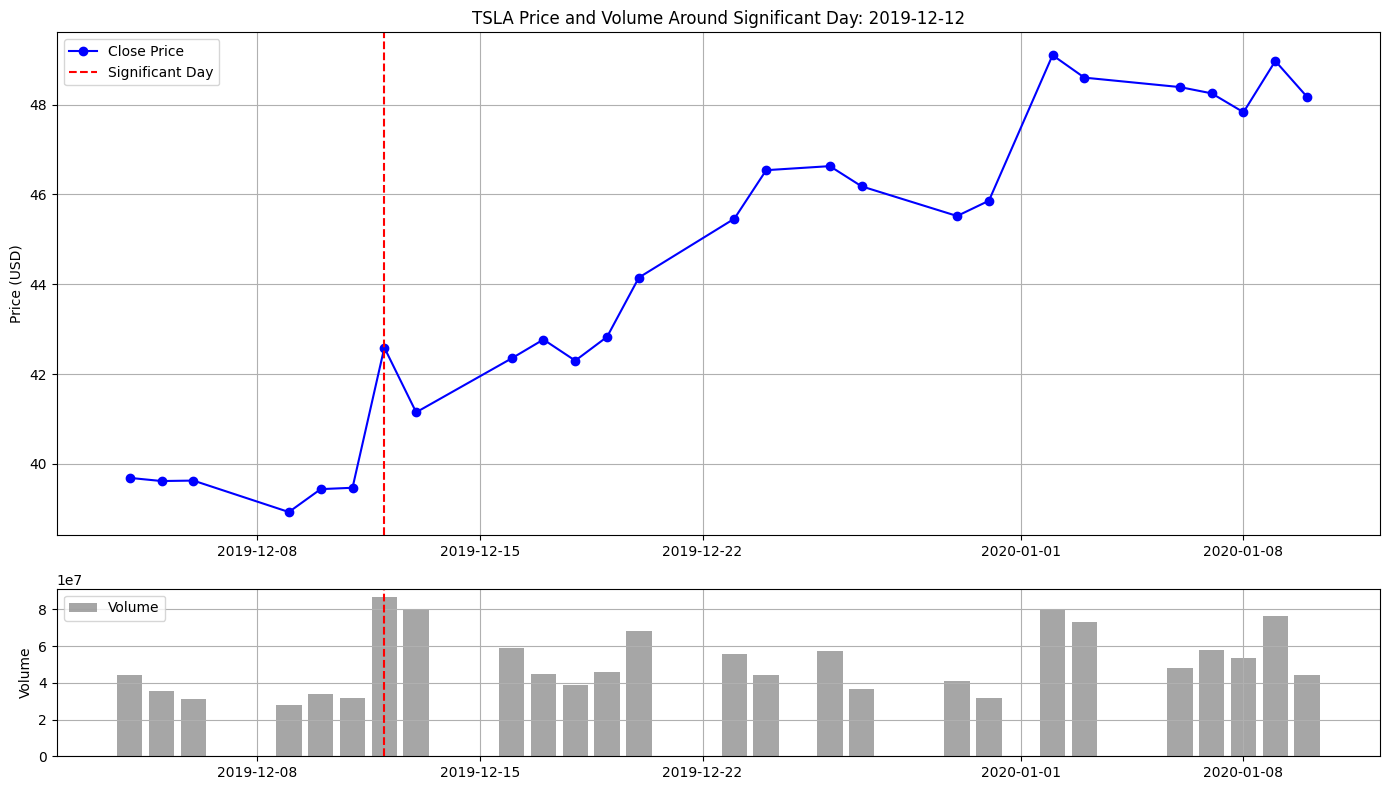

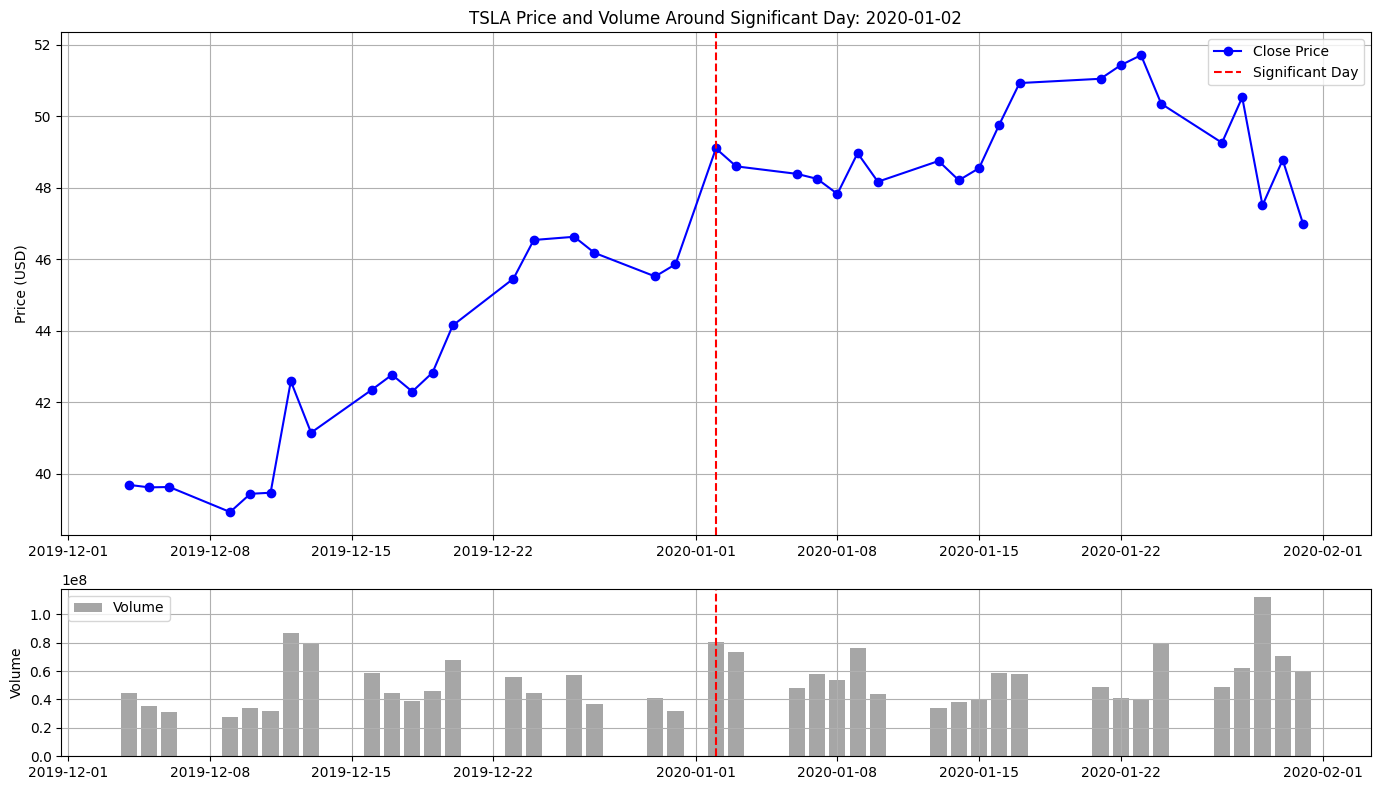

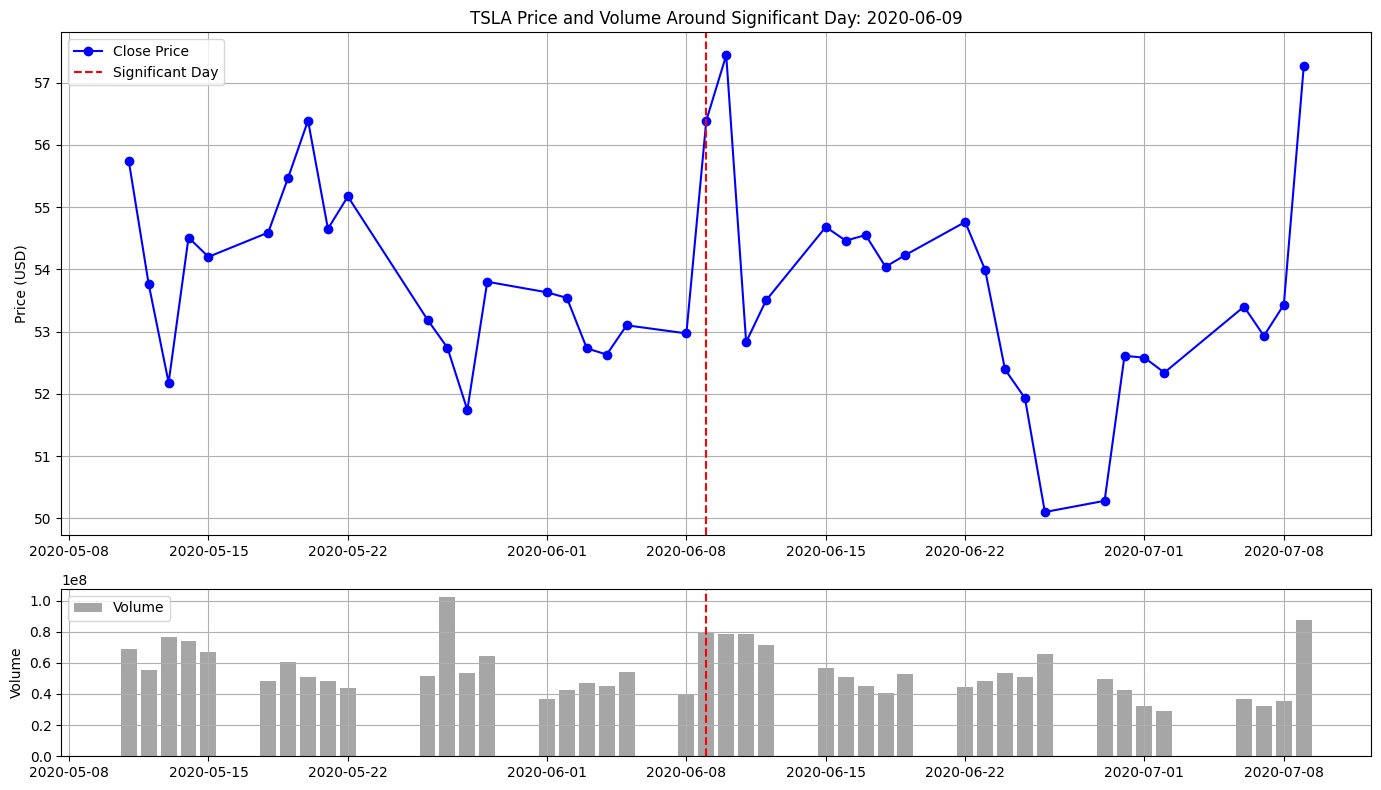

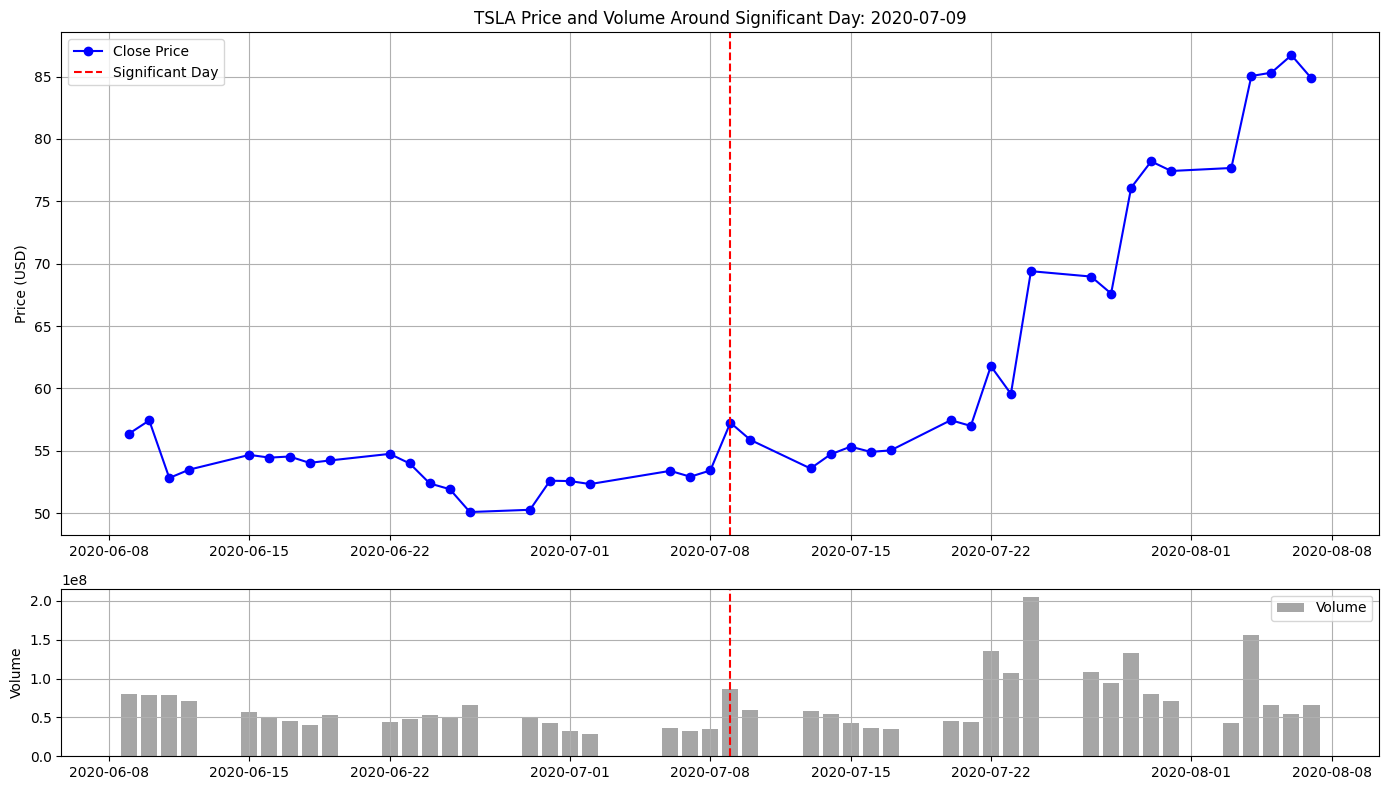

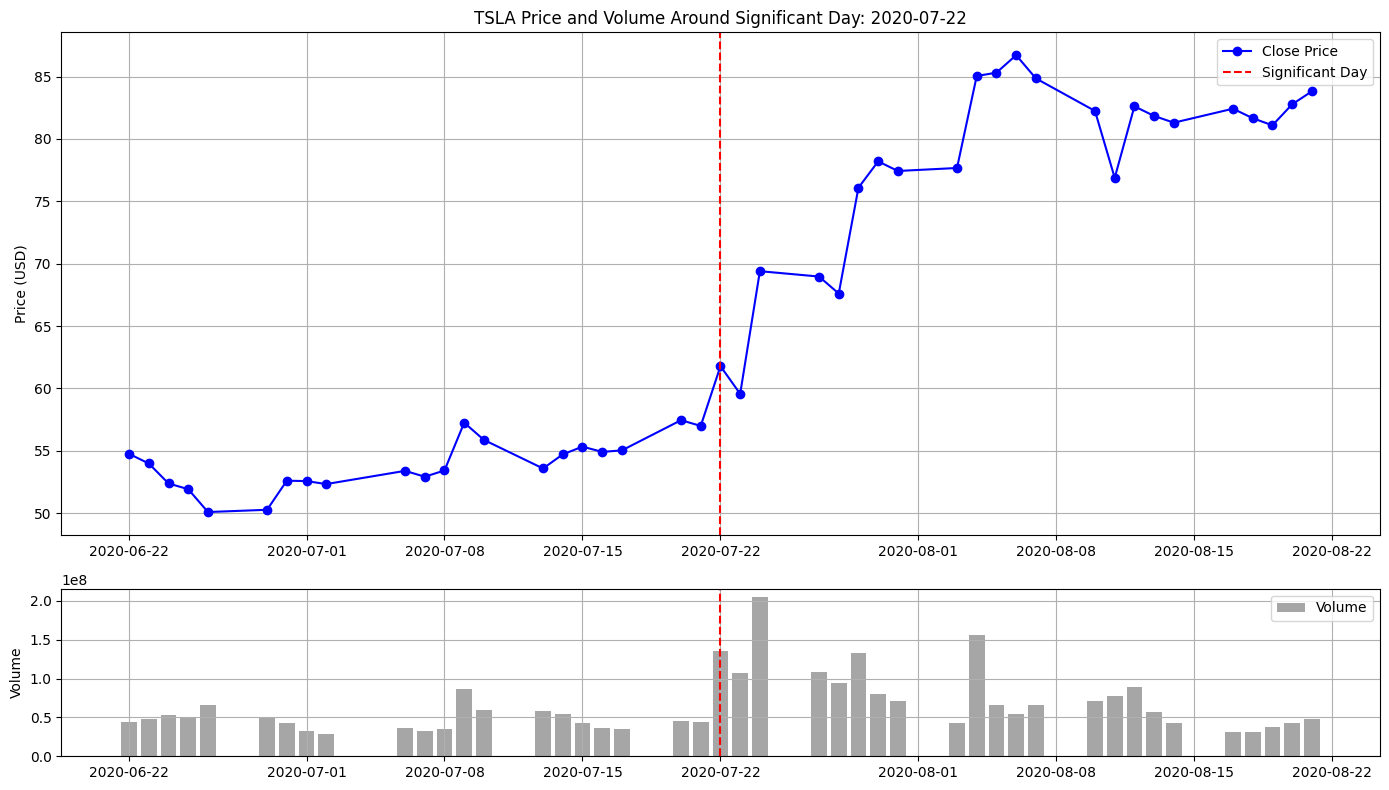

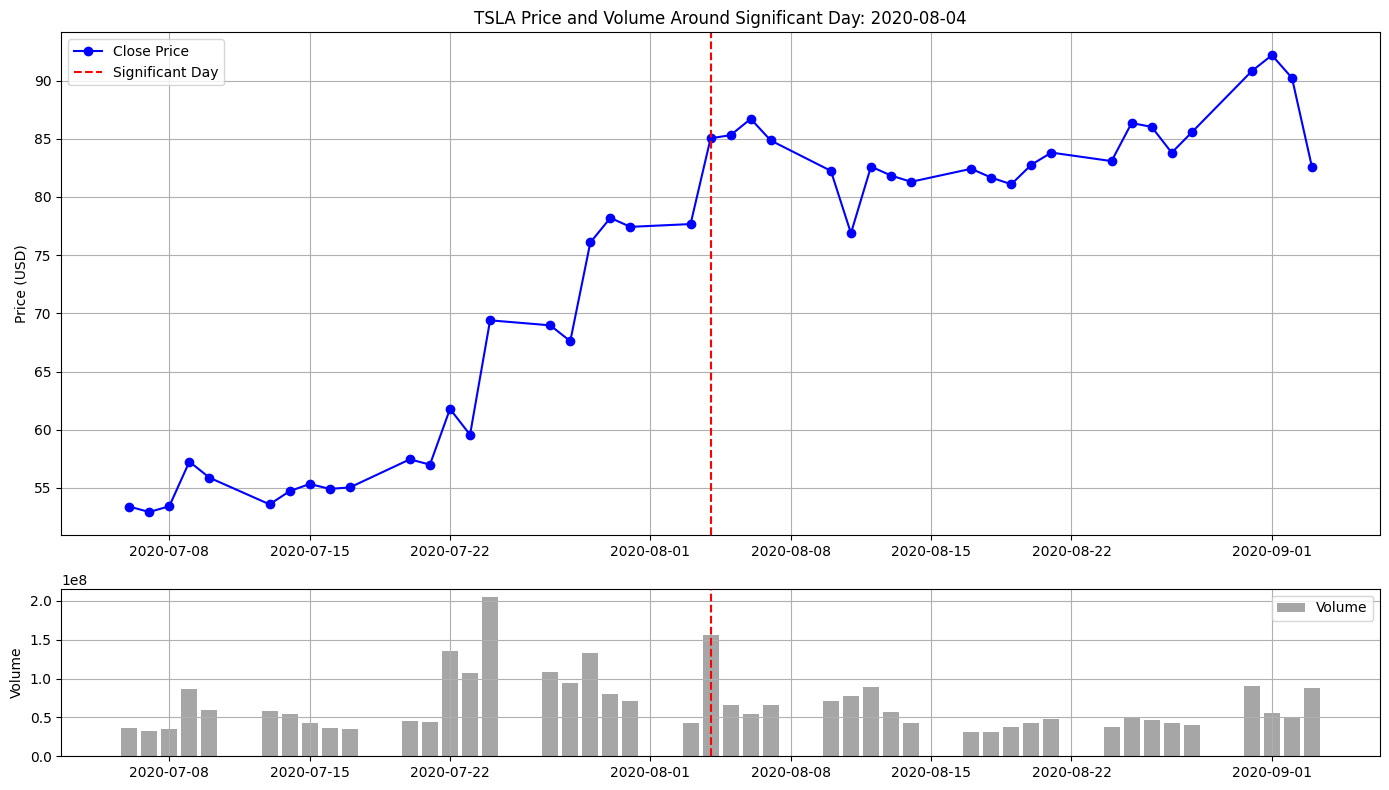

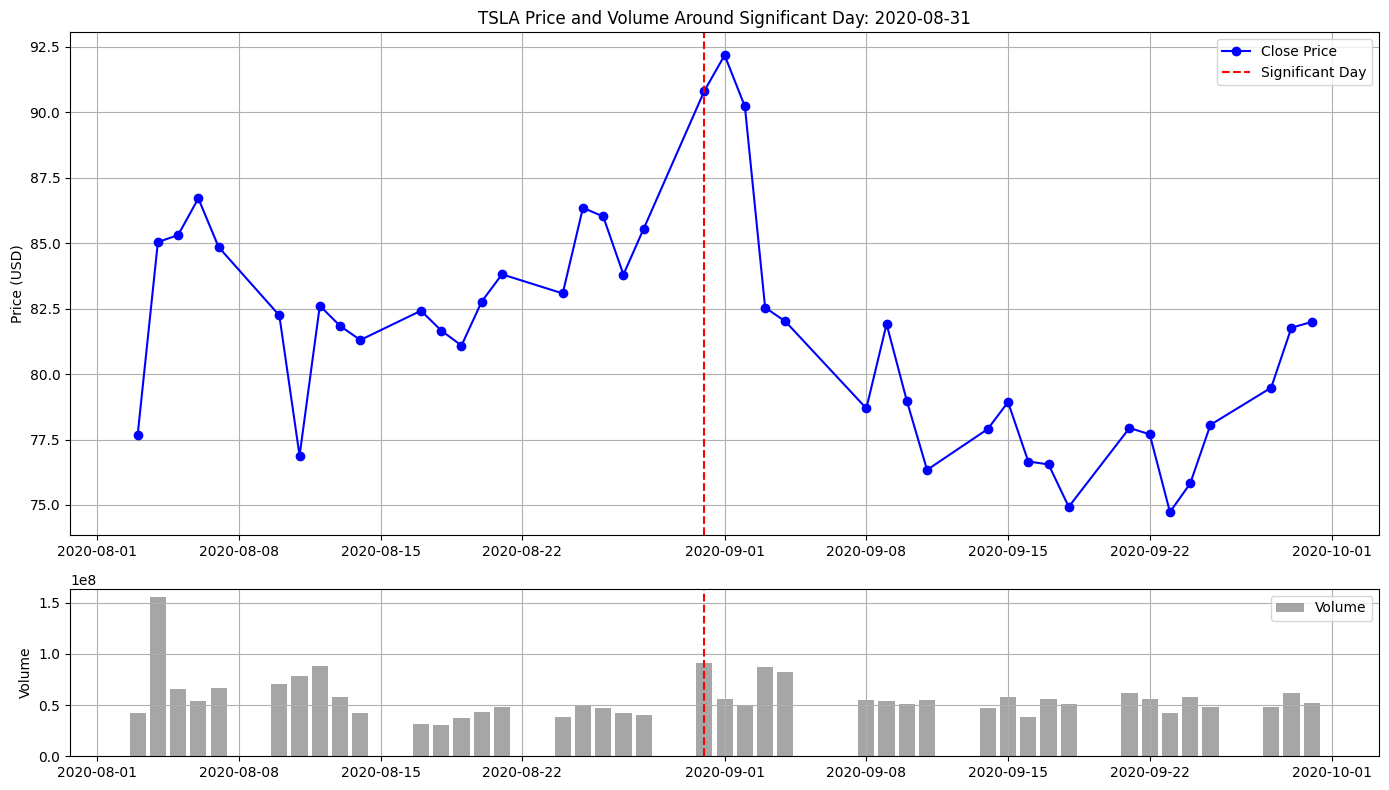

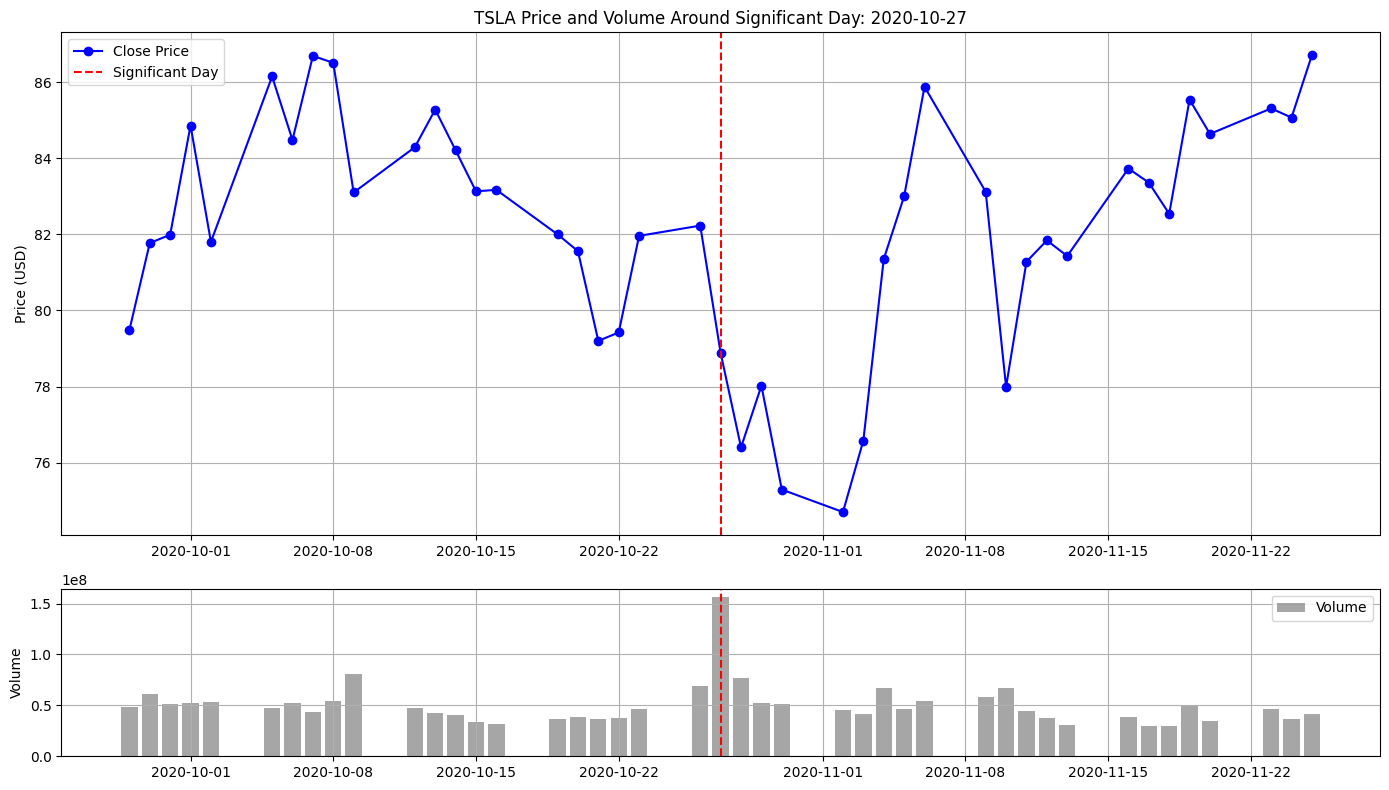

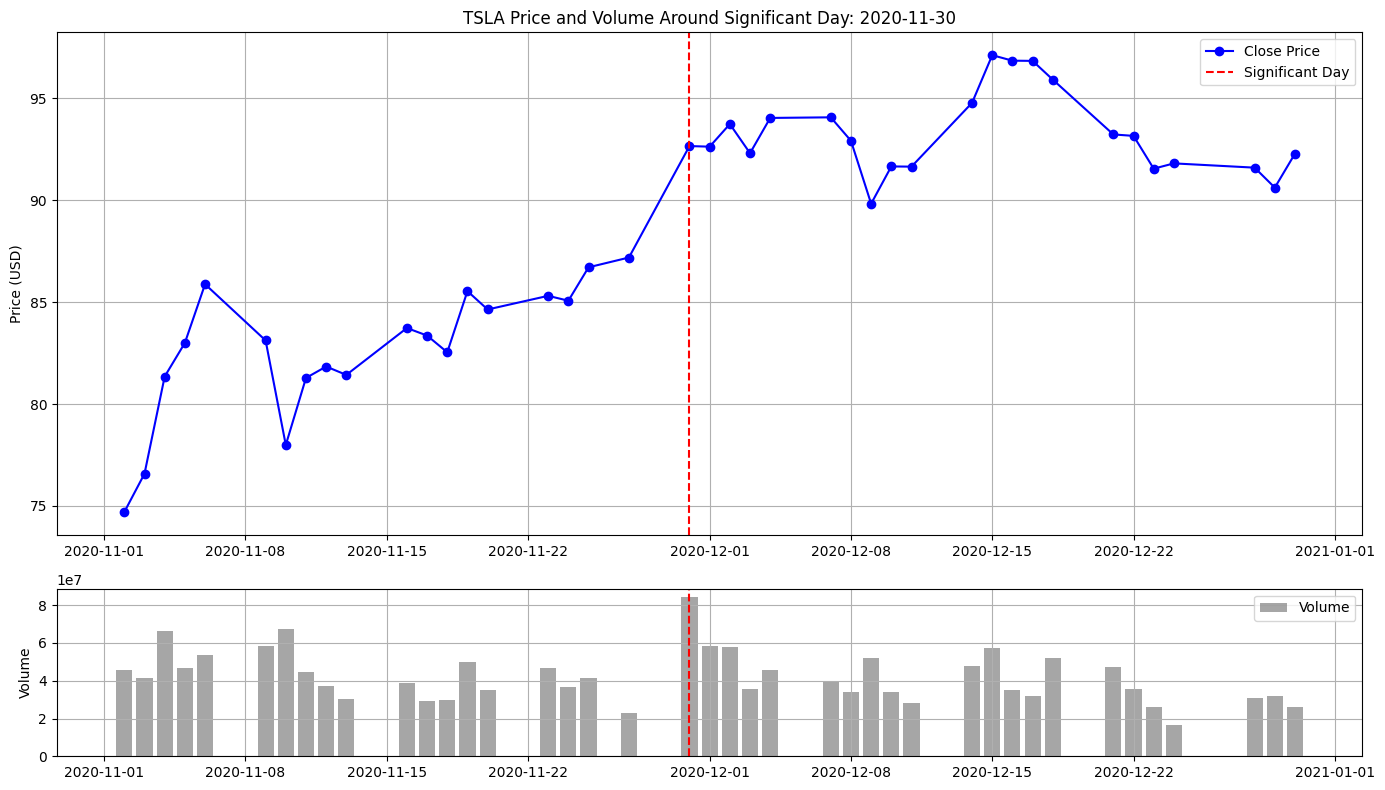

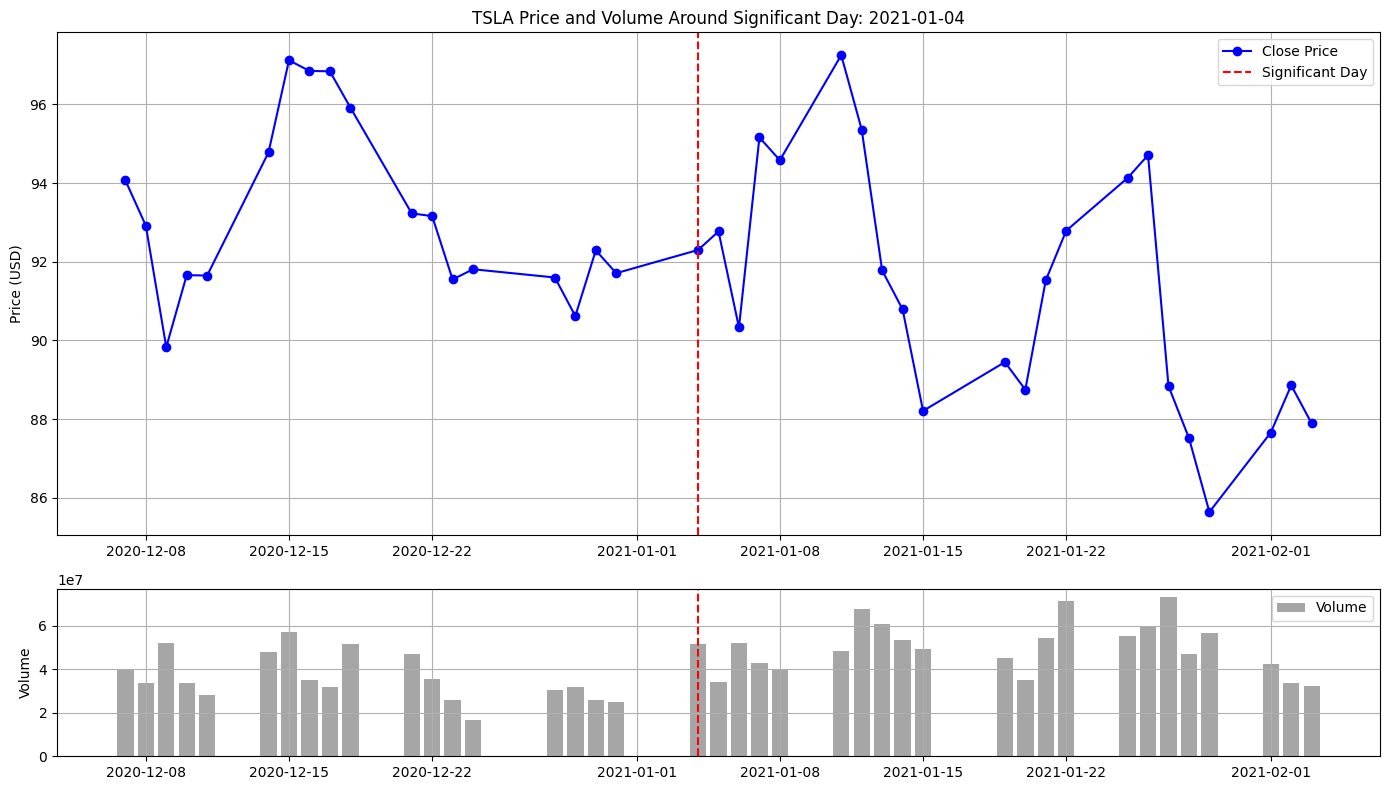

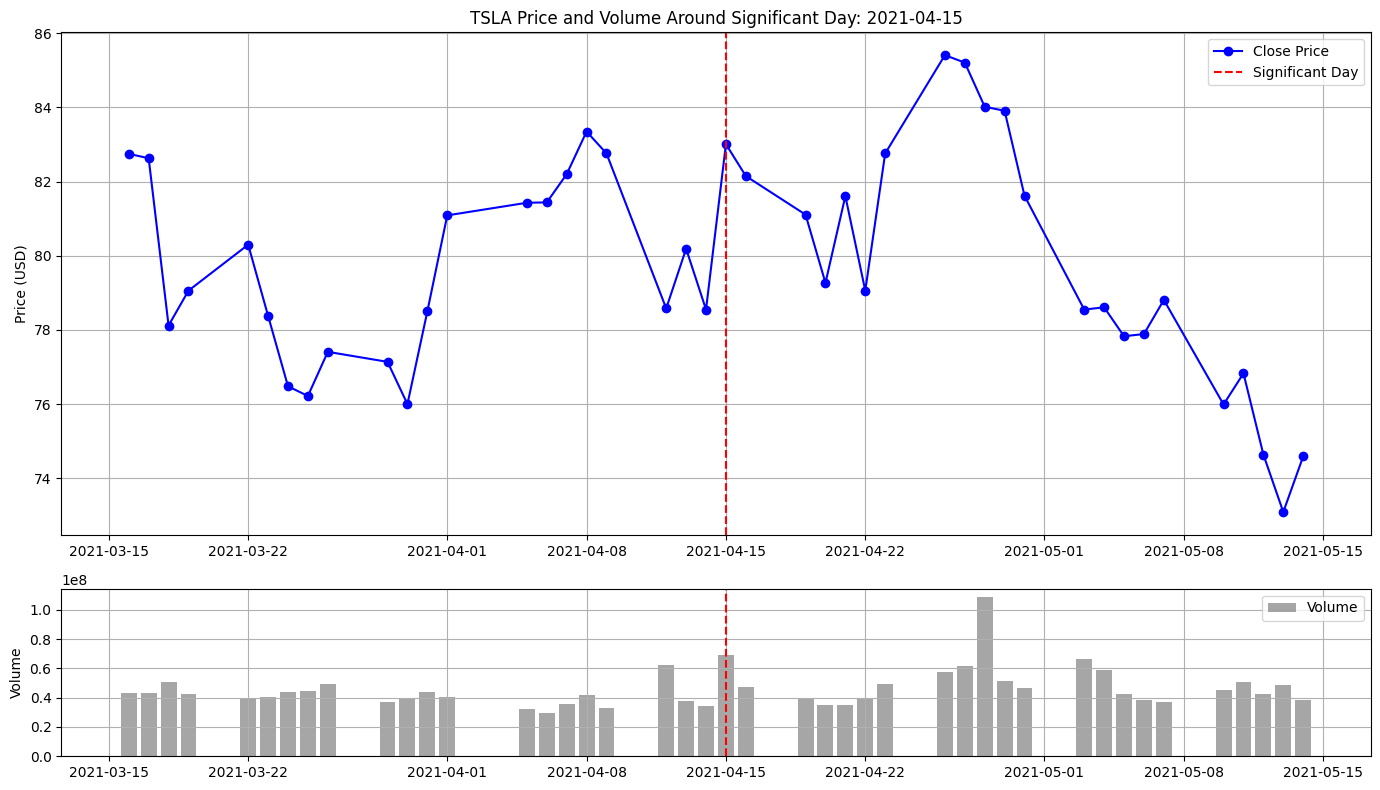

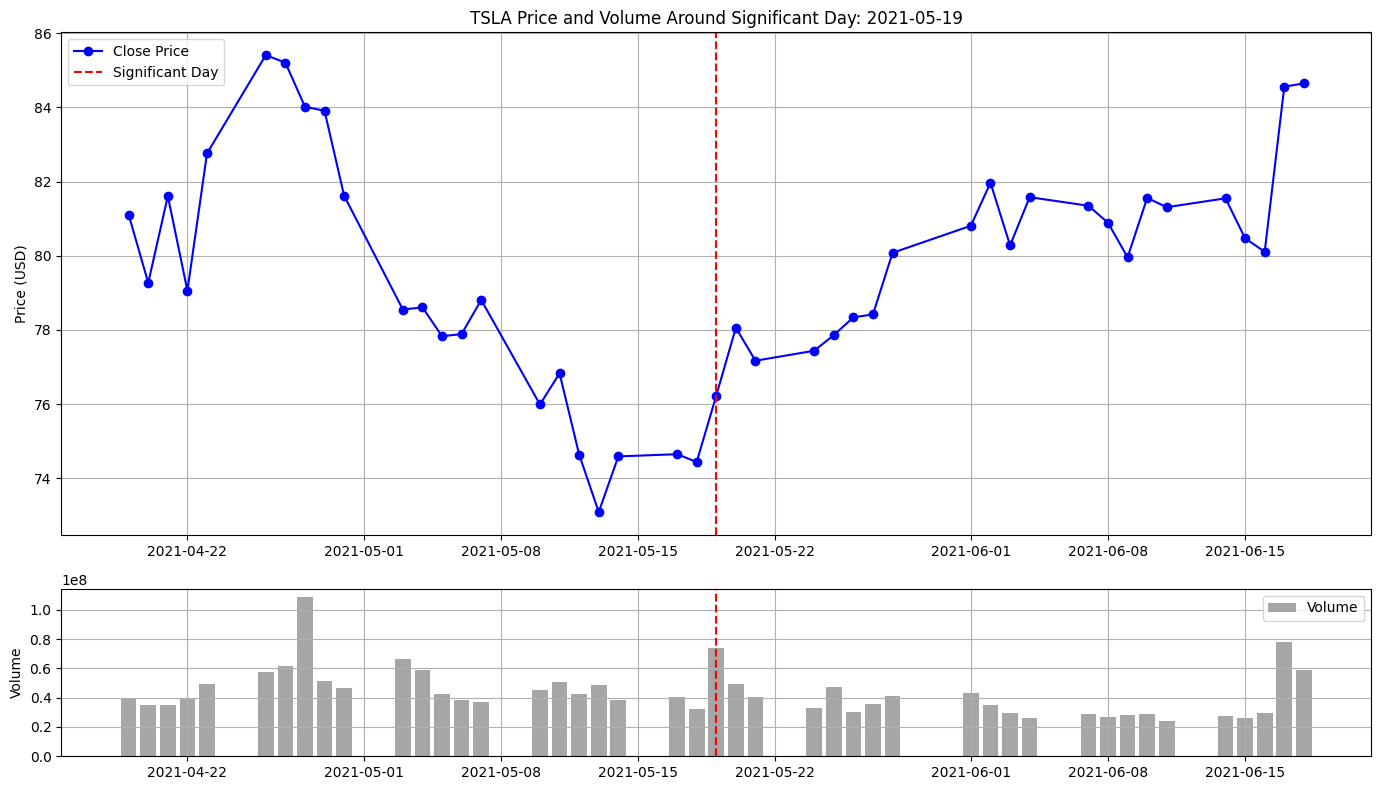

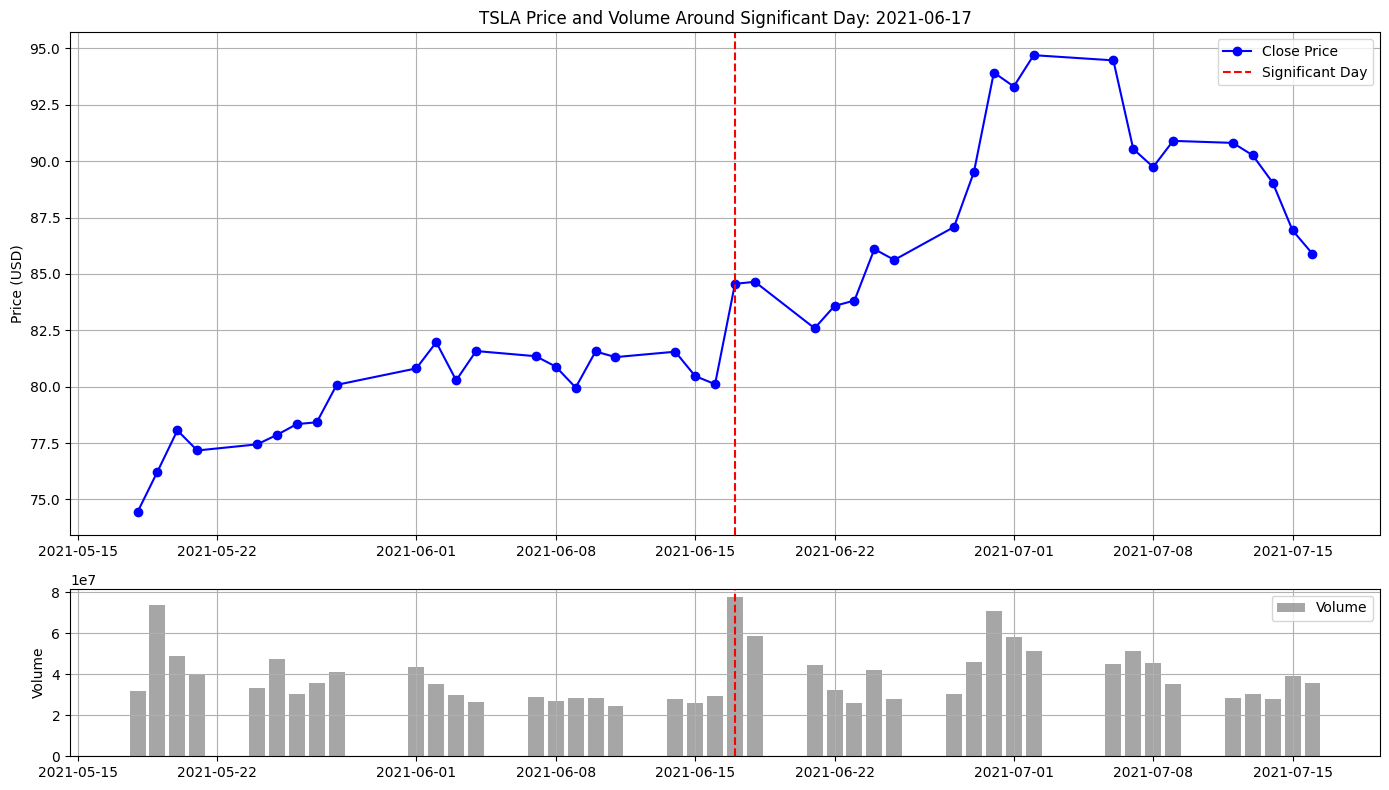

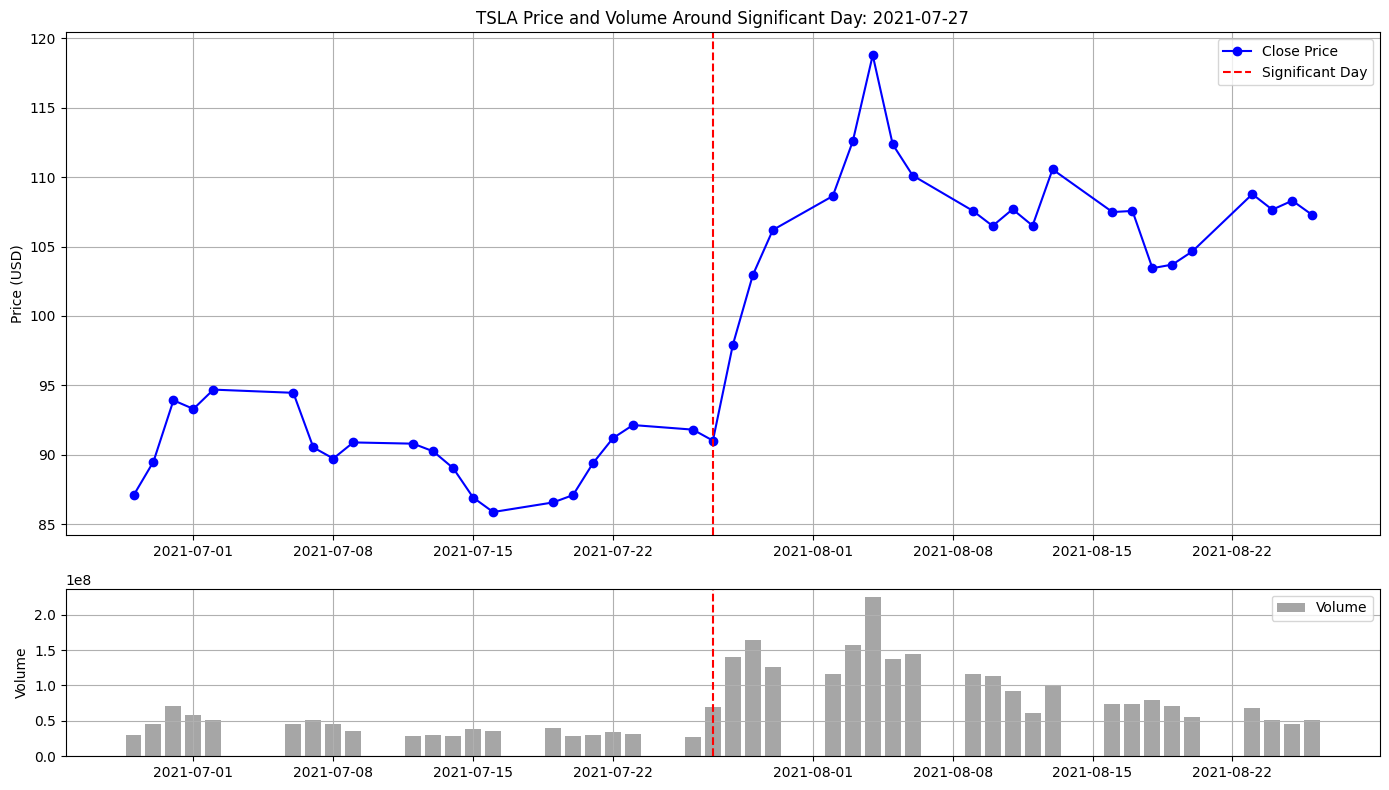

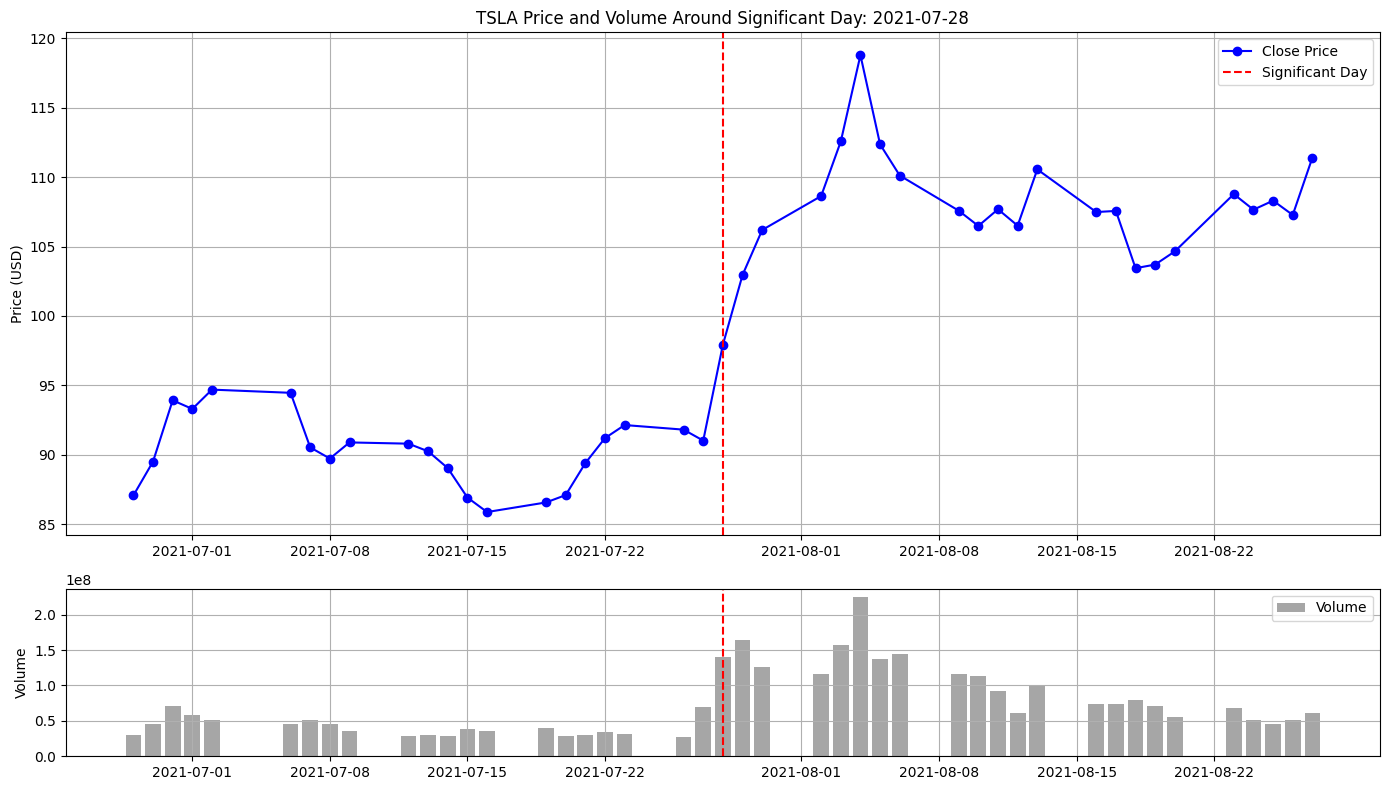

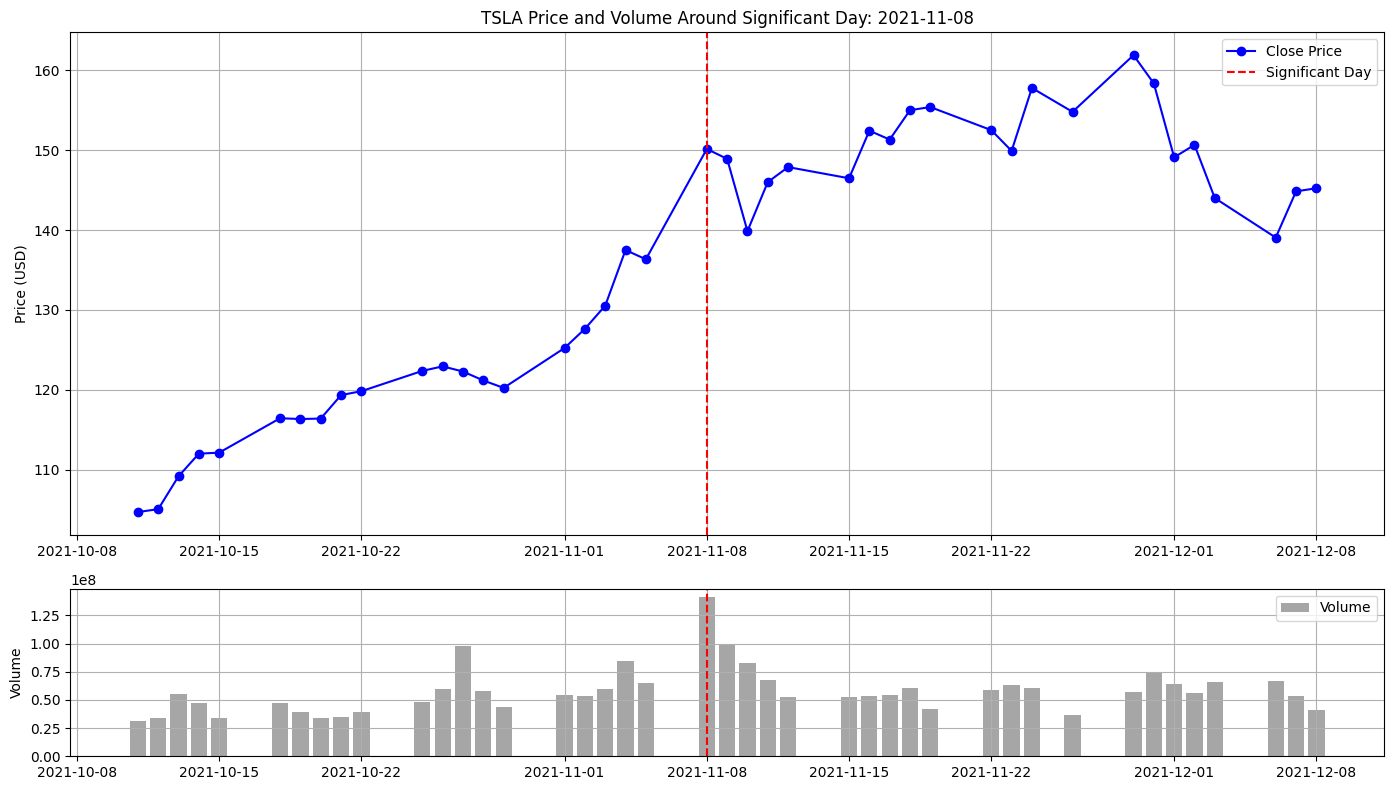

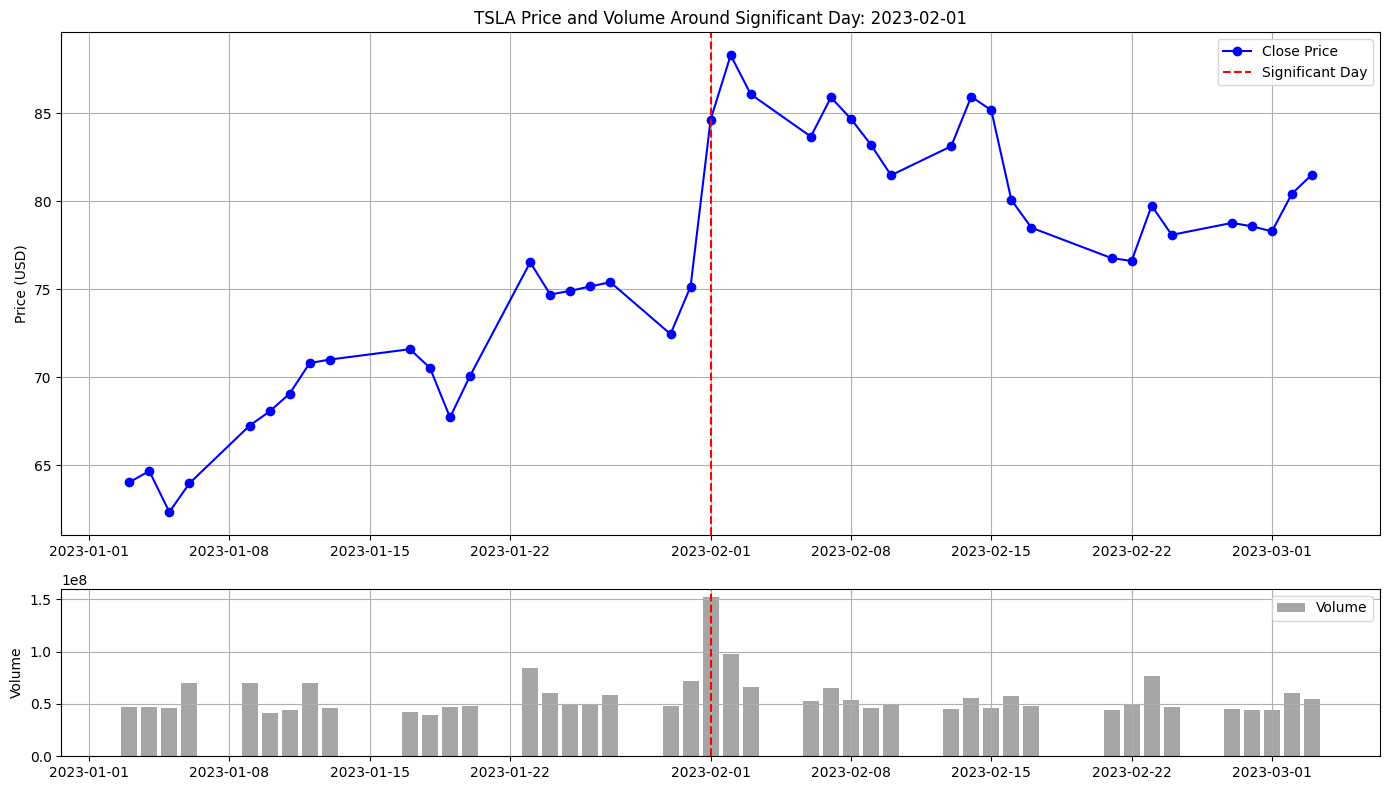

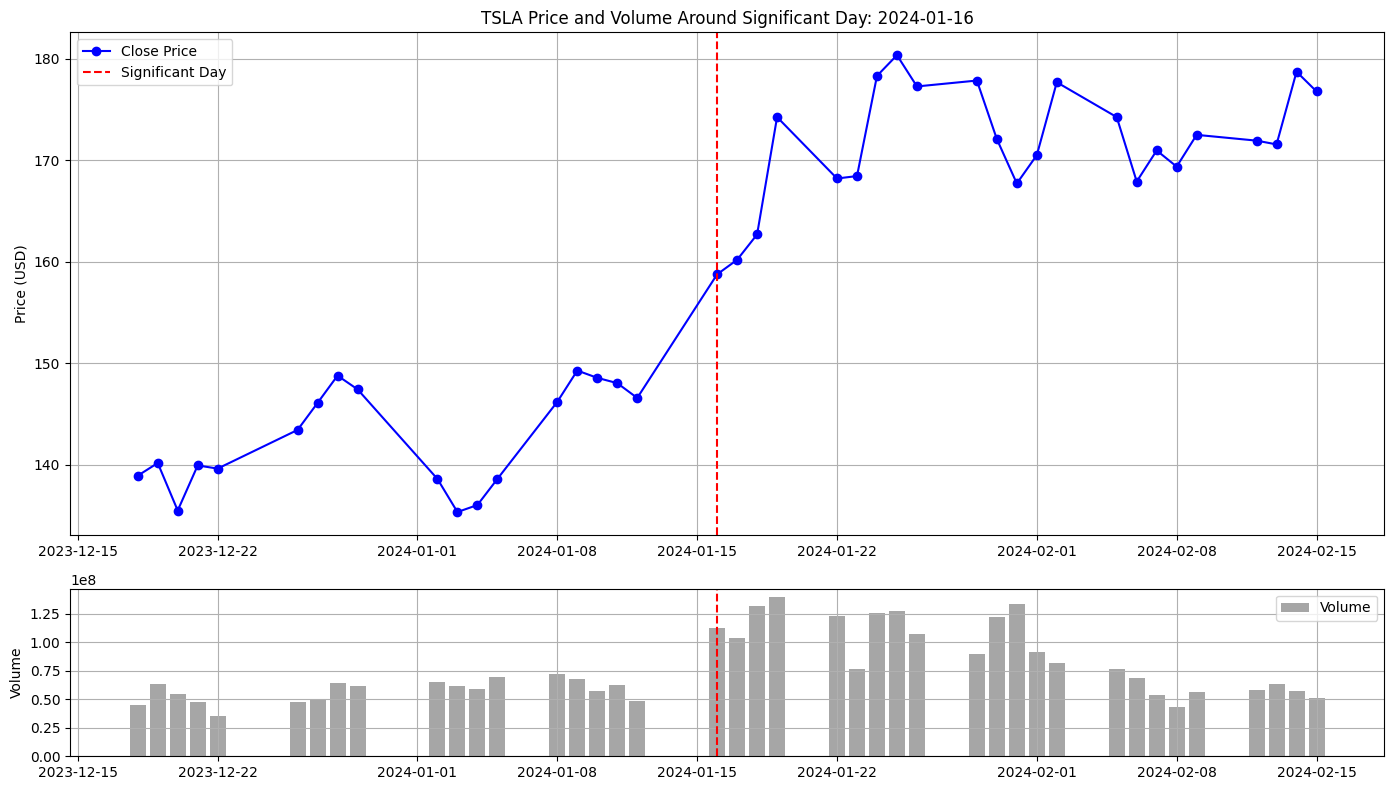

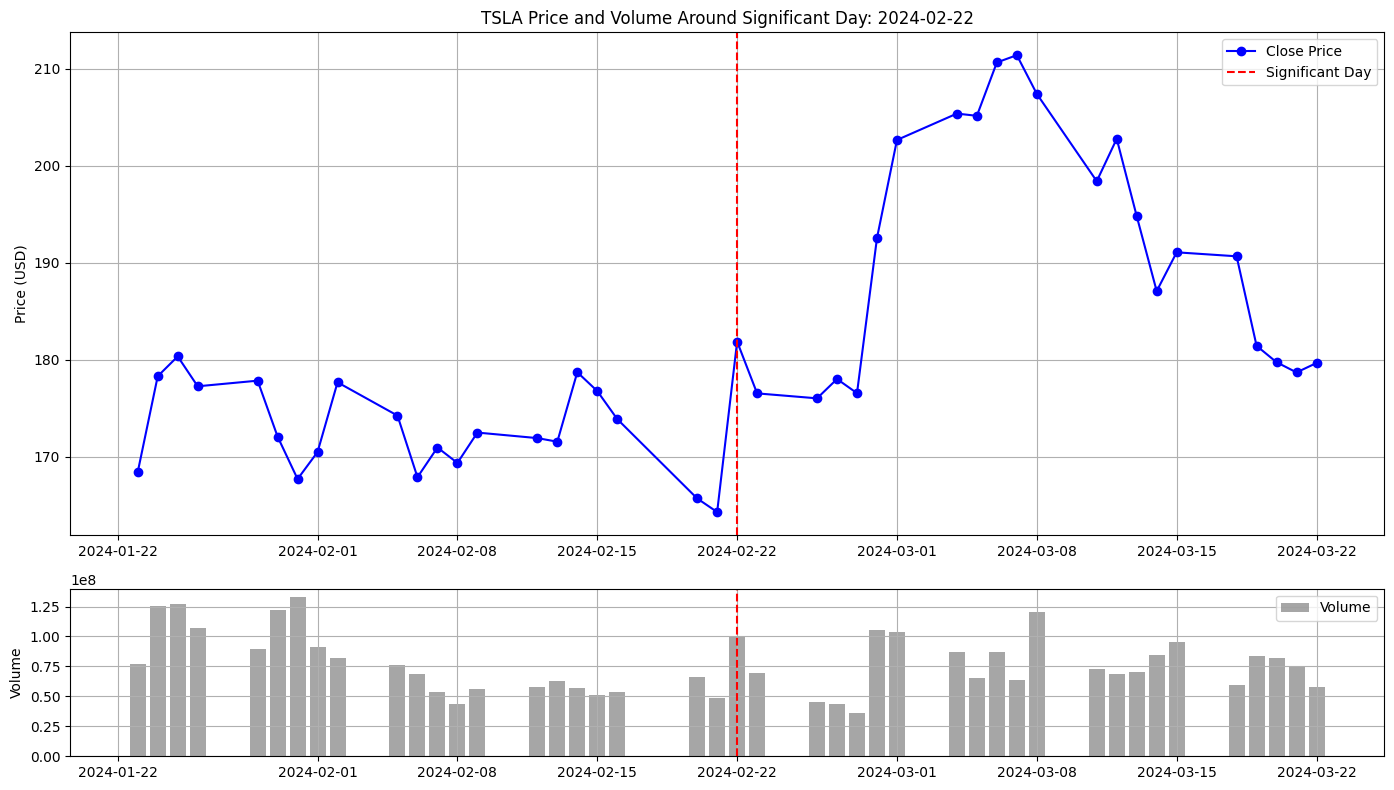

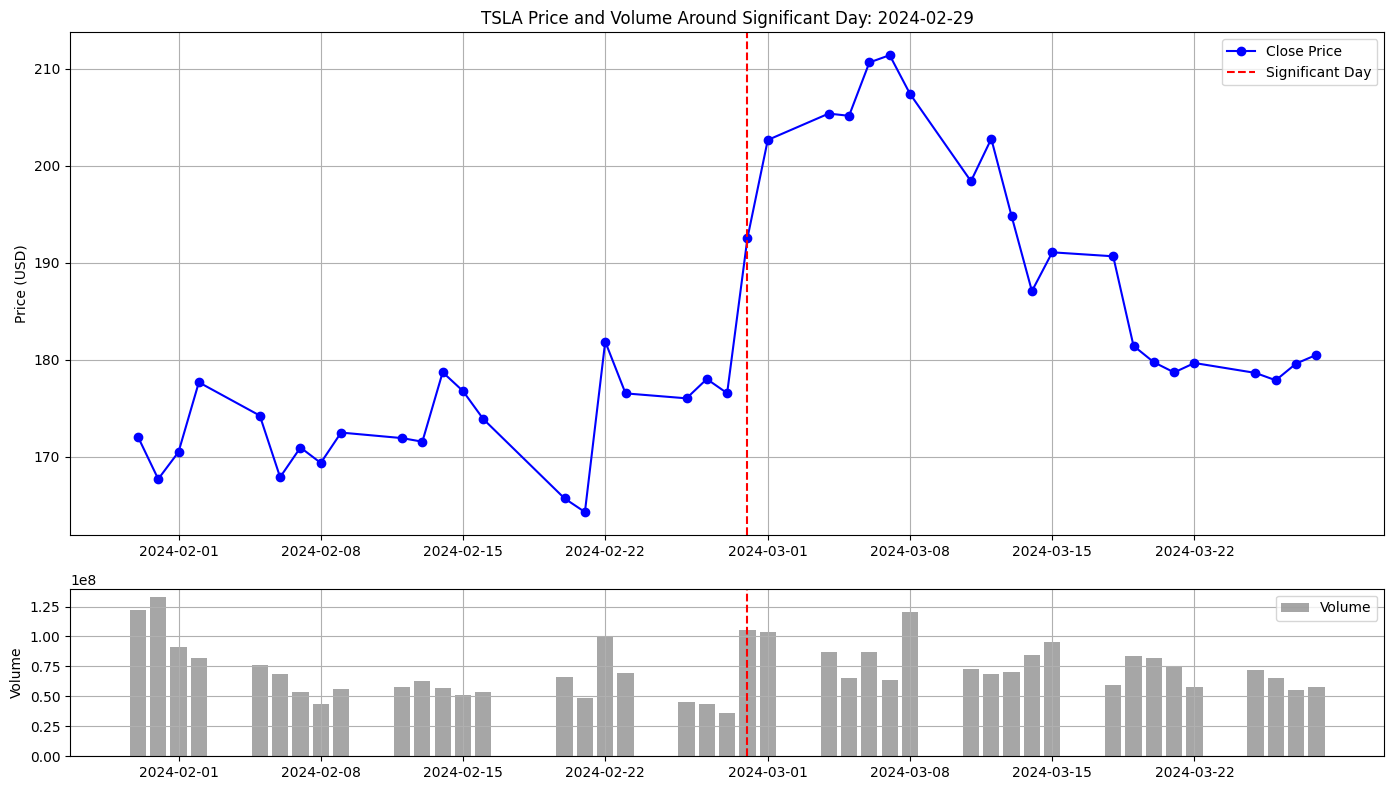

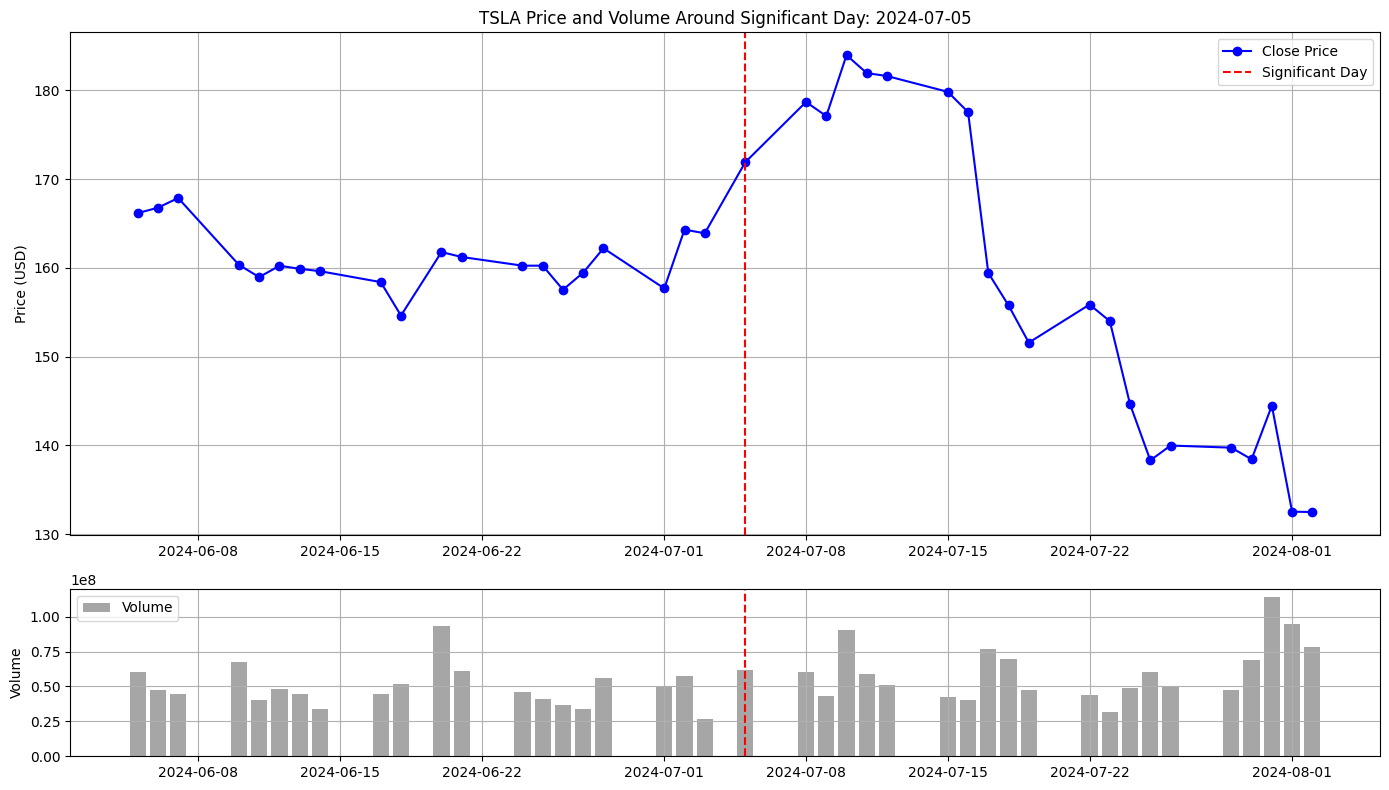

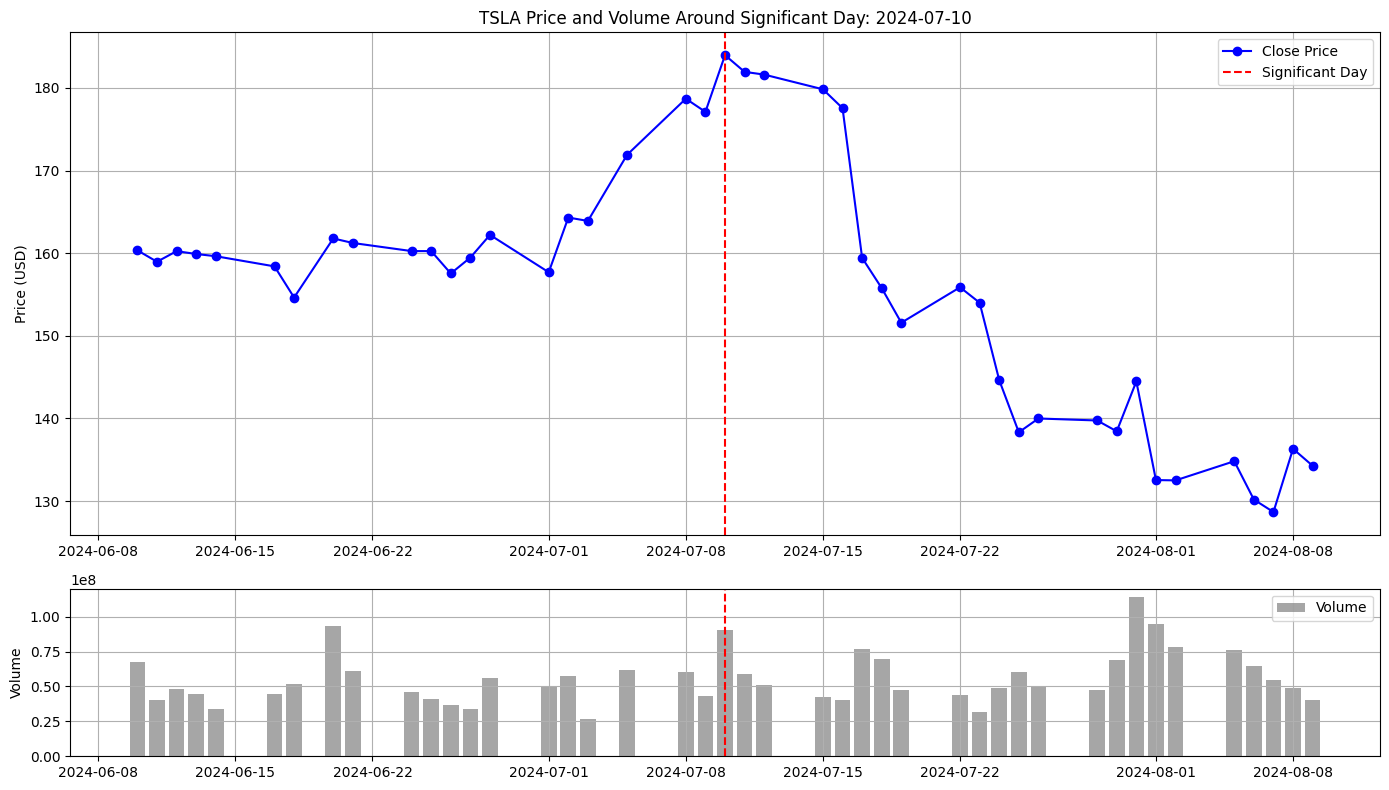

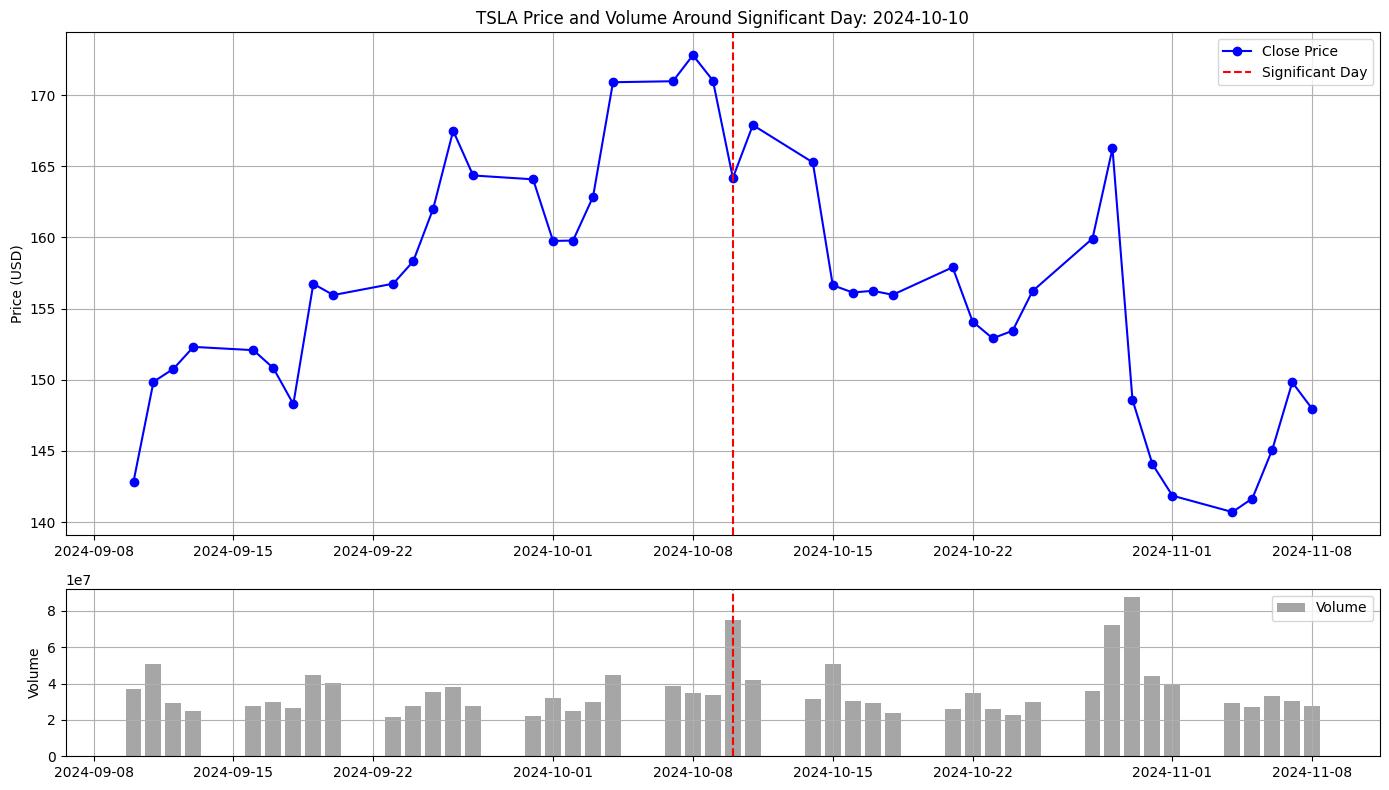

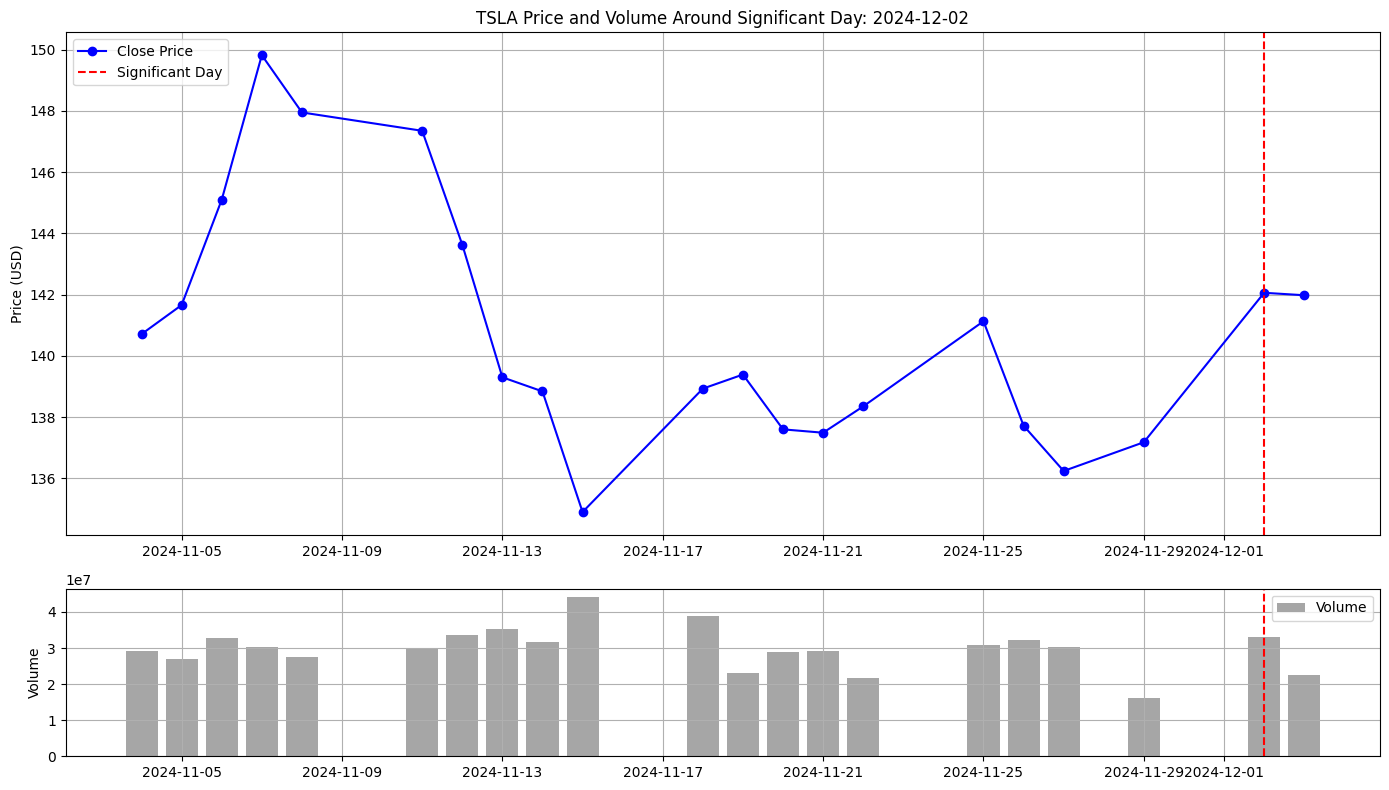

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to plot price and volume
def plot_price_and_volume(data, significant_days, days=30):
    for day in significant_days:
        if isinstance(day, pd.Timestamp):
            # Define start and end range
            start = day - pd.Timedelta(days=days)
            end = day + pd.Timedelta(days=days)

            # Subset the data
            subset = data.loc[start:end].copy()

            # Ensure subset is not empty
            if subset.empty:
                print(f"No data available for day {day}")
                continue

            # Convert index to datetime if needed
            if not isinstance(subset.index, pd.DatetimeIndex):
                subset.index = pd.to_datetime(subset.index)

            # Convert Volume to a simple list
            try:
                volume_list = subset['Volume'].squeeze().tolist()  # 날짜 제외, 거래량만 추출
            except Exception as e:
                print(f"Error converting Volume to list: {e}")
                continue

            # Create subplots
            fig = plt.figure(figsize=(14, 8))
            spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[3, 1])

            # Main graph: Price
            ax0 = fig.add_subplot(spec[0])
            ax0.plot(subset.index, subset['Close'], label='Close Price', color='blue', marker='o')
            ax0.axvline(x=day, color='red', linestyle='--', label='Significant Day')
            ax0.set_title(f"TSLA Price and Volume Around Significant Day: {day.date()}")
            ax0.set_ylabel("Price (USD)")
            ax0.legend()
            ax0.grid()

            # Secondary graph: Volume
            ax1 = fig.add_subplot(spec[1], sharex=ax0)
            try:
                ax1.bar(subset.index, volume_list, label='Volume', color='gray', alpha=0.7)
            except Exception as e:
                print(f"Error plotting Volume for day {day}: {e}")
                continue
            ax1.axvline(x=day, color='red', linestyle='--')
            ax1.set_ylabel("Volume")
            ax1.legend()
            ax1.grid()

            # Adjust layout and show
            plt.tight_layout()
            plt.show()

# Ensure significant_days is properly formatted
significant_days = [pd.Timestamp(day) for day in significant_days]

# Call the plot function
plot_price_and_volume(data, significant_days)


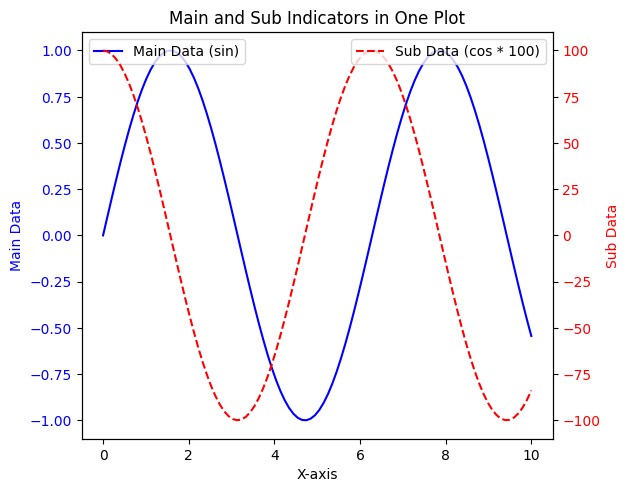

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.linspace(0, 10, 100)
main_data = np.sin(x)  # 주 지표 데이터
sub_data = np.cos(x) * 100  # 보조 지표 데이터 (단위가 다름)

# 기본 플롯
fig, ax1 = plt.subplots()

# 주 지표 플롯
ax1.plot(x, main_data, 'b-', label="Main Data (sin)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Main Data", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 보조축 추가
ax2 = ax1.twinx()
ax2.plot(x, sub_data, 'r--', label="Sub Data (cos * 100)")
ax2.set_ylabel("Sub Data", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 범례 추가
fig.tight_layout()  # 레이아웃 조정
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 그래프 출력
plt.title("Main and Sub Indicators in One Plot")
plt.show()
